In [7]:
import numpy as np
import matplotlib.pyplot as plt
from orbcomm_phase_obj import get_phase
from scipy.optimize import least_squares as lsq

In [2]:
def haversine_np(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [3]:
def myfit(coords):
    myargs=[(1627441379,325,'FM110',1839,'./niagara/pols_4bit_1627441379_10000_1959_0_None.npz'),\
            (1627439234,484,'FM118',1839,'./niagara/pols_4bit_1627439234_10000_2947_0_None.npz'),\
            (1627448324,518,'FM107',1846,'./niagara/pols_4bit_1627448324_10000_3155_0_None.npz')]
    ant1=[51.4646065, -68.2352594, 341.052]
    chisq=0
    for args in myargs:
        chisq+=get_phase(ant1,[coords[0],coords[1],coords[2]],*args)[0]
    return chisq

In [4]:
def myfit2(coords):
    myargs=[(1627441379,325,'FM110',1839,'./niagara/pols_4bit_1627441379_10000_1959_0_None.npz'),\
            (1627439234,484,'FM118',1839,'./niagara/pols_4bit_1627439234_10000_2947_0_None.npz'),\
            (1627448324,518,'FM107',1846,'./niagara/pols_4bit_1627448324_10000_3155_0_None.npz')]
    ant1=[51.4646065, -68.2352594, 341.052]
    residuals = np.array([])
    for args in myargs:
        residuals = np.append(residuals,get_phase(ant1,[coords[0],coords[1],coords[2]],*args)[0])
    return residuals

In [11]:
def make_res_plots(coords):
    myargs=[(1627441379,325,'FM110',1839,'./niagara/pols_4bit_1627441379_10000_1959_0_None.npz'),\
            (1627439234,484,'FM118',1839,'./niagara/pols_4bit_1627439234_10000_2947_0_None.npz'),\
            (1627448324,518,'FM107',1846,'./niagara/pols_4bit_1627448324_10000_3155_0_None.npz')]
    ant1=[51.4646065, -68.2352594, 341.052]
    dt = 10000*4096/250e6
    fig,ax=plt.subplots(1,3)
    fig.set_size_inches(12,4)
    for i,args in enumerate(myargs):
        
        chisq, simphase, predphase, obsphase = get_phase(ant1,[coords[0],coords[1],coords[2]],*args)
        t = np.arange(0,obsphase.shape[0])*dt
        res=obsphase-predphase
        n=len(res)
        print(res[int(0.25*n):int(0.75*n)].std())
        ax[i].plot(t,res-res.mean())
        ax[i].set_xlabel("Time (s)")
        ax[i].set_ylabel("Phase residual (rad)")
        ax[i].set_title(args[2])
    plt.tight_layout()

In [8]:
ant2=[51.4641932, -68.2348603] #starting point for fitting

In [11]:
lsq(myfit,ant2)

niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] cata

niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] cata

 active_mask: array([0., 0.])
        cost: 29732349.315353632
         fun: array([7711.33572286])
        grad: array([ 2.05739811e+12, -1.72439446e+12])
         jac: array([[ 2.66801782e+08, -2.23618128e+08]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 19
        njev: 6
  optimality: 2057398113622.5474
      status: 3
     success: True
           x: array([ 51.46419117, -68.23487835])

niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC


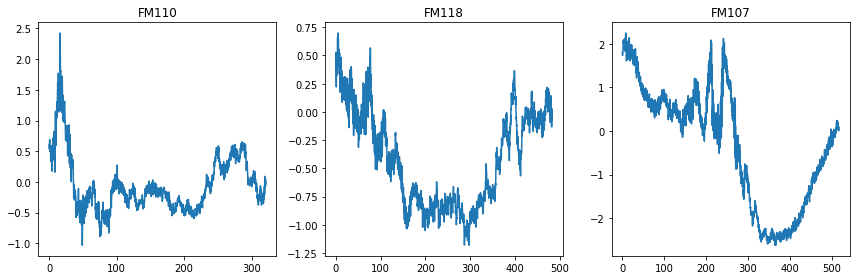

In [21]:

make_res_plots([ 51.46419117, -68.23487835]) #fit only lat, lon

In [22]:
ant2=[51.4641932, -68.2348603, 336.499] #starting point for fitting
lsq(myfit,ant2)

niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] cata

niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] cata

 active_mask: array([0., 0., 0.])
        cost: 29433093.83520795
         fun: array([7672.4303627])
        grad: array([ 1.28978795e+12, -2.89576471e+11,  0.00000000e+00])
         jac: array([[ 1.68106831e+08, -3.77424698e+07,  0.00000000e+00]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 18
        njev: 5
  optimality: 1289787953813.3064
      status: 3
     success: True
           x: array([ 51.46419073, -68.23487816, 336.499     ])

niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC


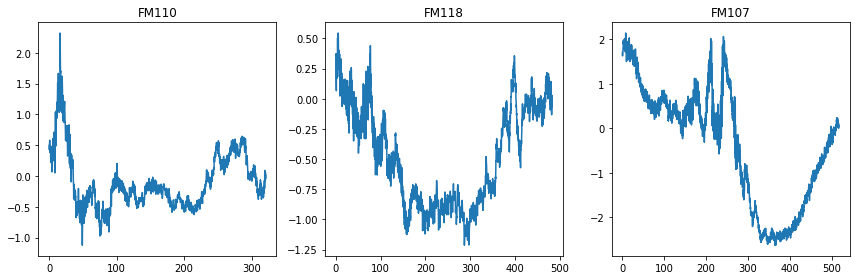

In [24]:

make_res_plots([ 51.46419073, -68.23487816, 336.499]) #fit lat, lon, ele

In [6]:
ant2=[51.4641932, -68.2348603, 336.499] #starting point for fitting
lsq(myfit2,ant2,method='lm')

niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] cata

 active_mask: array([0, 0, 0])
        cost: 977.1653062817178
         fun: array([0.32847518, 0.2557509 , 0.36294299, ..., 0.01329994, 0.06733418,
       0.06933594])
        grad: array([-1.49920863e+06, -5.05976679e+06,  3.28354450e-03])
         jac: array([[ 2.01499919e+05, -1.23683790e+05,  1.49899082e-02],
       [ 2.01375377e+05, -1.23656351e+05,  1.52313391e-02],
       [ 2.01250835e+05, -1.23628912e+05,  1.54727699e-02],
       ...,
       [ 9.45564829e+03,  3.21717834e+04,  2.33602536e-03],
       [ 9.52661547e+03,  3.22411139e+04,  1.16801268e-03],
       [ 9.59758265e+03,  3.23104444e+04,  0.00000000e+00]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 13
        njev: None
  optimality: 5059766.78809531
      status: 2
     success: True
           x: array([ 51.46418956, -68.23487849, 338.32526665])

niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
0.18365603183846488
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
0.131248662236416
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
0.8078487286061442


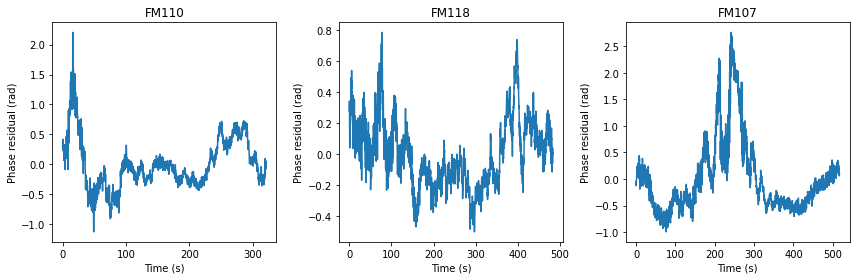

In [12]:

make_res_plots([ 51.46418956, -68.23487849, 338.32526665]) #fit lat, lon, ele with LM, and residuals not Chisq

In [11]:
ant2=[51.4641932, -68.2348603, 336.499] #starting point for fitting
lsq(myfit2,ant2,method='trf') #fit TRF but with residuals, not chisq  .. CONVERGES TO SAME VALUE AS LM. Nice.

niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] catalog #40087 epoch 2021-07-27 12:10:29 UTC
niter is 325
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM110 [+] catalog #41182 epoch 2021-07-27 19:55:29 UTC
niter is 484
Chanidx is 37
FREQ 137.75634765625  MHz
ORBCOMM FM118 [+] catalog #41183 epoch 2021-07-27 12:46:24 UTC
niter is 518
Chanidx is 44
FREQ 137.3291015625  MHz
ORBCOMM FM107 [+] cata

 active_mask: array([0., 0., 0.])
        cost: 977.1653133109086
         fun: array([0.32850188, 0.25577757, 0.36296963, ..., 0.01329985, 0.06733413,
       0.06933594])
        grad: array([ 0.40307217, 11.51355479,  0.02216292])
         jac: array([[ 2.01499910e+05, -1.23683791e+05,  1.44580213e-02],
       [ 2.01375368e+05, -1.23656352e+05,  1.47638677e-02],
       [ 2.01250826e+05, -1.23628912e+05,  1.50697142e-02],
       ...,
       [-1.41935070e+02,  1.93696836e+02,  2.17784854e-03],
       [-7.09675349e+01,  2.63027197e+02,  1.08892568e-03],
       [ 0.00000000e+00,  3.32357558e+02,  0.00000000e+00]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 4
        njev: 4
  optimality: 11.51355478874757
      status: 2
     success: True
           x: array([ 51.46418956, -68.23487849, 338.32526053])

In [23]:
# fitval=[ 51.46418956, -68.23487849, 338.32526665]
fitval=[ 51.46418956, -68.23487849, 338.32526053]
old_2021_coords = [51.4642, -68.23486]
print(fitval,ant2)
haversine_np(*fitval[:-1],*ant2[:-1])*1000

[51.46418956, -68.23487849, 338.32526053] [51.4641932, -68.2348603, 336.499]


1.3226862666433676

In [25]:
haversine_np(*fitval[:-1],*old_2021_coords)*1000

1.7275888669115822

In [26]:
haversine_np(*ant2[:-1],*old_2021_coords)*1000

0.7559361459416413

In [15]:
2*np.pi*0.1/3e8 * 138e6

0.289026524130261

In [16]:
0.2/(2*np.pi*138e6)

2.3065933781434107e-10